# Graphs and Matrices
The objective for this notebook is to provide some background to help understand how spectral clustering works.  
The focus is on graph Laplacian matrices and what they tell us about graphs. 

In [1]:
import numpy as np
import pandas as pd
from scipy.sparse.csgraph import laplacian
import matplotlib.pyplot as plt 
import networkx as nx
%matplotlib inline

Some helper functions. 

In [2]:
# Plot the eigenvalues for the Laplacian matrix for a given adjacency matrix
def plot_eval_adj_matrix(m):
    Lsn = laplacian(m)
    e_val, e_vec = np.linalg.eig(Lsn)
    idx = np.argsort(e_val)
    e_val = e_val[idx]
    y_pos = np.arange(len(e_val))+1

    plt.bar(y_pos, e_val, align='center', alpha=0.5)
    plt.xticks(y_pos)
    plt.ylabel('Size')
    plt.xlabel('Eigenvalue')
    plt.title('Eigenvalues of Laplacian')
    plt.show()
    
# A function to produce the Laplacian matrix from an adjacency matrix
# and return the v'th eigenvector
def laplace_evec_from_adj_matrix(m,v):
    Lsn = laplacian(m)
    e_val, e_vec = np.linalg.eig(Lsn)
    idx = np.argsort(e_val)
    e_val = e_val[idx]
    e_vec = e_vec[:,idx]
    return e_vec[:,v]

# A function to get the Fiedler vector for a given adjacency matrix
def fiedler_from_adj_matrix(m):
    return laplace_evec_from_adj_matrix(m,1)

The basic graph with three connected components (i.e. not fully connected).

In [3]:
sn = np.array([[0,1,1,0,0,0,0,0,0,0,0,0],
               [1,0,1,0,0,0,0,0,0,0,0,0],
               [1,1,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,1,1,0,0,0,0,0,0],
               [0,0,0,1,0,1,1,0,0,0,0,0],
               [0,0,0,1,1,0,1,0,0,0,0,0],
               [0,0,0,0,1,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,1,1,0],
               [0,0,0,0,0,0,0,1,0,1,0,1],
               [0,0,0,0,0,0,0,1,1,0,1,1],
               [0,0,0,0,0,0,0,1,0,1,0,1],
               [0,0,0,0,0,0,0,0,1,1,1,0]]
             )

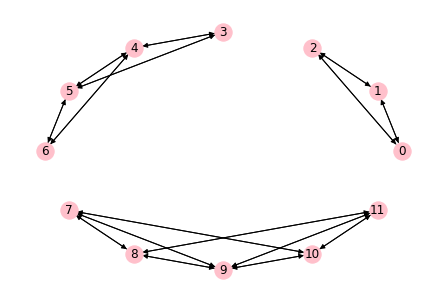

In [4]:
sn0 = sn.copy()
G0 = nx.DiGraph(sn0) # converting to networkx format for visualisation
nx.draw(G0,with_labels=True,node_color='pink', pos=nx.circular_layout(G0))
plt.show()

In [5]:
Lsn = laplacian(sn0)
Lsn

array([[ 2, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1, -1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2, -1, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  3, -1, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1, -1,  3, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1, -1,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3, -1, -1, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  3, -1,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  0, -1, -1,  4, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  3, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  3]])

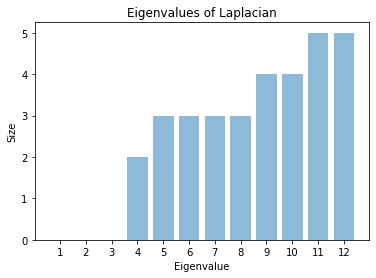

In [6]:
# This laplacian has three zero eigenvalues
plot_eval_adj_matrix(sn0)

Put the first three eigenvectors in a dataframe

In [7]:
Lsn = laplacian(sn0)
e_val, e_vec = np.linalg.eig(Lsn)
lev1 = laplace_evec_from_adj_matrix(sn0,0)
lev2 = laplace_evec_from_adj_matrix(sn0,1)
lev3 = laplace_evec_from_adj_matrix(sn0,2)
n3_df = pd.DataFrame(lev1, columns=['Ev1'], index = range(1,13))
n3_df['Ev2']=lev2
n3_df['Ev3']=lev3
n3_df

,Ev1,Ev2,Ev3
1,-0.57735,0.0,0.000000
2,-0.57735,0.0,0.000000
3,-0.57735,0.0,0.000000
4,0.00000,0.5,0.000000
5,0.00000,0.5,0.000000
6,0.00000,0.5,0.000000
7,0.00000,0.5,0.000000
8,0.00000,0.0,0.447214
9,0.00000,0.0,0.447214
10,0.00000,0.0,0.447214


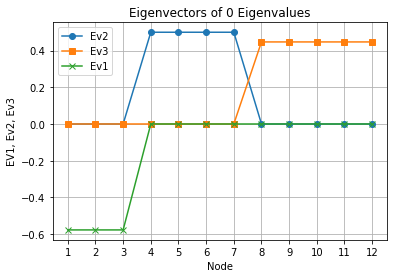

In [8]:
labels = list(n3_df.index)
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots()
ax.plot(n3_df['Ev2'].values, marker = 'o', label = 'Ev2')
ax.plot(n3_df['Ev3'].values, marker = 's', label = 'Ev3')
ax.plot(n3_df['Ev1'].values, marker = 'x', label = 'Ev1')


plt.grid(True)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Node')
ax.set_ylabel('EV1, Ev2, Ev3')
plt.title('Eigenvectors of 0 Eigenvalues')
ax.legend()

Make a copy of the graph and add some new edges to connect two of the components

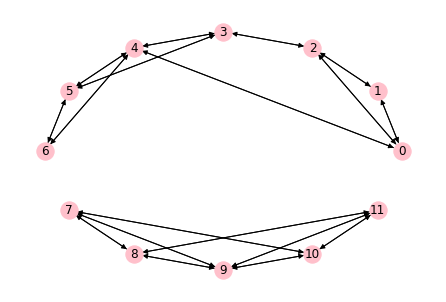

In [9]:
sn1 = sn0.copy()
sn1[3,2] = sn1[2,3] =1
sn1[4,0] = sn1[0,4] =1

G1 = nx.DiGraph(sn1)
#nx.draw(G1,with_labels=True,node_color='pink', pos=nx.circular_layout(G1))
nx.draw(G1,with_labels=True,node_color='pink', pos=nx.circular_layout(G1))

Now there are just two zero eigenvalues

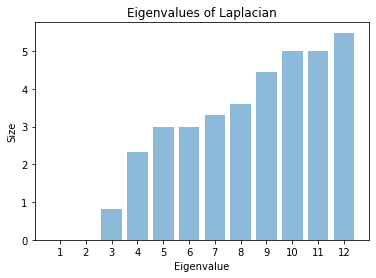

In [10]:
plot_eval_adj_matrix(sn1)

Add another edge to fully connect the graph

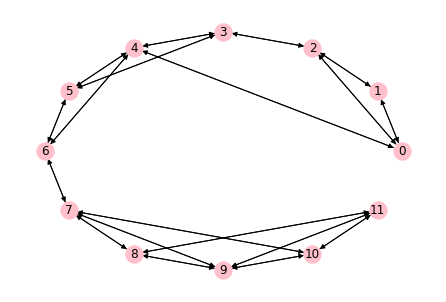

In [11]:
sn2 = sn1.copy()
sn2[6,7]=sn2[7,6]=1
G2 = nx.DiGraph(sn2)
nx.draw(G2,with_labels=True,node_color='pink', pos=nx.circular_layout(G2))

Now there is just one zero eigen value for the single connected component

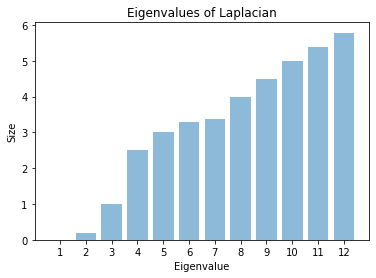

In [12]:
plot_eval_adj_matrix(sn2)

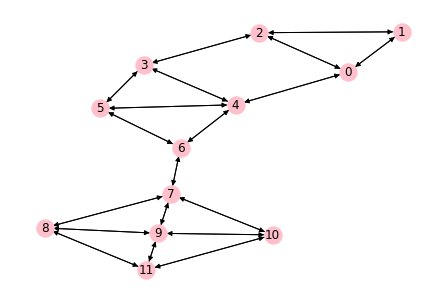

In [19]:
nx.draw(G2,with_labels=True,node_color='pink', pos=nx.kamada_kawai_layout(G2)) # Alternative layout

### Fiedler vector
A demonstration of how the Fiedler vector helps partition the graph. 

In [ ]:
ev1 = laplace_evec_from_adj_matrix(sn2,0)
fv = fiedler_from_adj_matrix(sn2)
fv

In [ ]:
fiedler_df = pd.DataFrame(ev1, columns=['Ev1'], index = range(1,13))
fiedler_df['Ev2'] = fv
fiedler_df

In [ ]:
labels = list(fiedler_df.index)
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots()
ax.plot(fiedler_df['Ev1'].values, marker = 'o', label = 'Ev1')
ax.plot(fiedler_df['Ev2'].values, marker = 's', label = 'Ev2 (Fiedler)')
ax.axhline(linewidth=3, color="g")  



plt.grid(True)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Node')
ax.set_ylabel('EV1, Ev2')
plt.title('Eigenvectors 1 and 2 (Fiedler)')
ax.legend()

In [ ]:
laplace_evec_from_adj_matrix(sn1,0)

In [ ]:
laplace_evec_from_adj_matrix(sn1,1)

In [ ]:
laplace_evec_from_adj_matrix(sn0,0)

In [ ]:
laplace_evec_from_adj_matrix(sn0,1)

In [ ]:
laplace_evec_from_adj_matrix(sn0,2)